<h1><center> Seismic activity and deformation of the North Pacific crustal zone, Colombia</center></h1>

<b>Jhon Restrepo

<b>Colombian Geological Survey

<p style='text-align: justify;'> This notebook is an overview of some of the seismic features of the North Pacific crustal zone (Colombia), with earthquake plots based on data from 1993 to 2022, resultant focal mechanism of the area and deformation velocities based on it.</p>

## Motivation
<p style='text-align: justify;'> This is an area with high seismic activity due to the convergence of different tectonic plates and blocks, such as the Nazca, Caribbean, and South American plates; the Coiba Microplate, and Panamá, Chocó and North Andean Blocks. In that region, there is subduction and strike-slip faulting (Cardona et al., 2005; Kellogg et al., 2019; Kobayashi et al., 2014; Mora-Páez et al., 2019). This is the most active crustal seismogenic source in Colombia (Tary et al., 2022), with many historical seismic events that resulted in monetarial costs and human losses, for instance, the 1992 Murindó seismic sequence. </p>
<p style='text-align: justify;'> The aim of this brief analysis is to investigate the deformation of seismic events in the Murindó Seismogenic Zone. This is achieved by plotting the distribution of earthquakes between June 1993 and December 2022. To study deformation, I used the focal mechanisms of earthquakes related to the area. I calculated the resultant seismic moment tensor (Aki & Richards, 1980), as well as the tensor and components of deformation velocities using the formulations of Kostrov (1974). All these parameters were calculated based on the surface catalog of seismic events, with a maximum depth of 30 km, given that this is a crustal zone and that is the reported depth for the area (Poveda et al., 2015).</p>

### Map the area

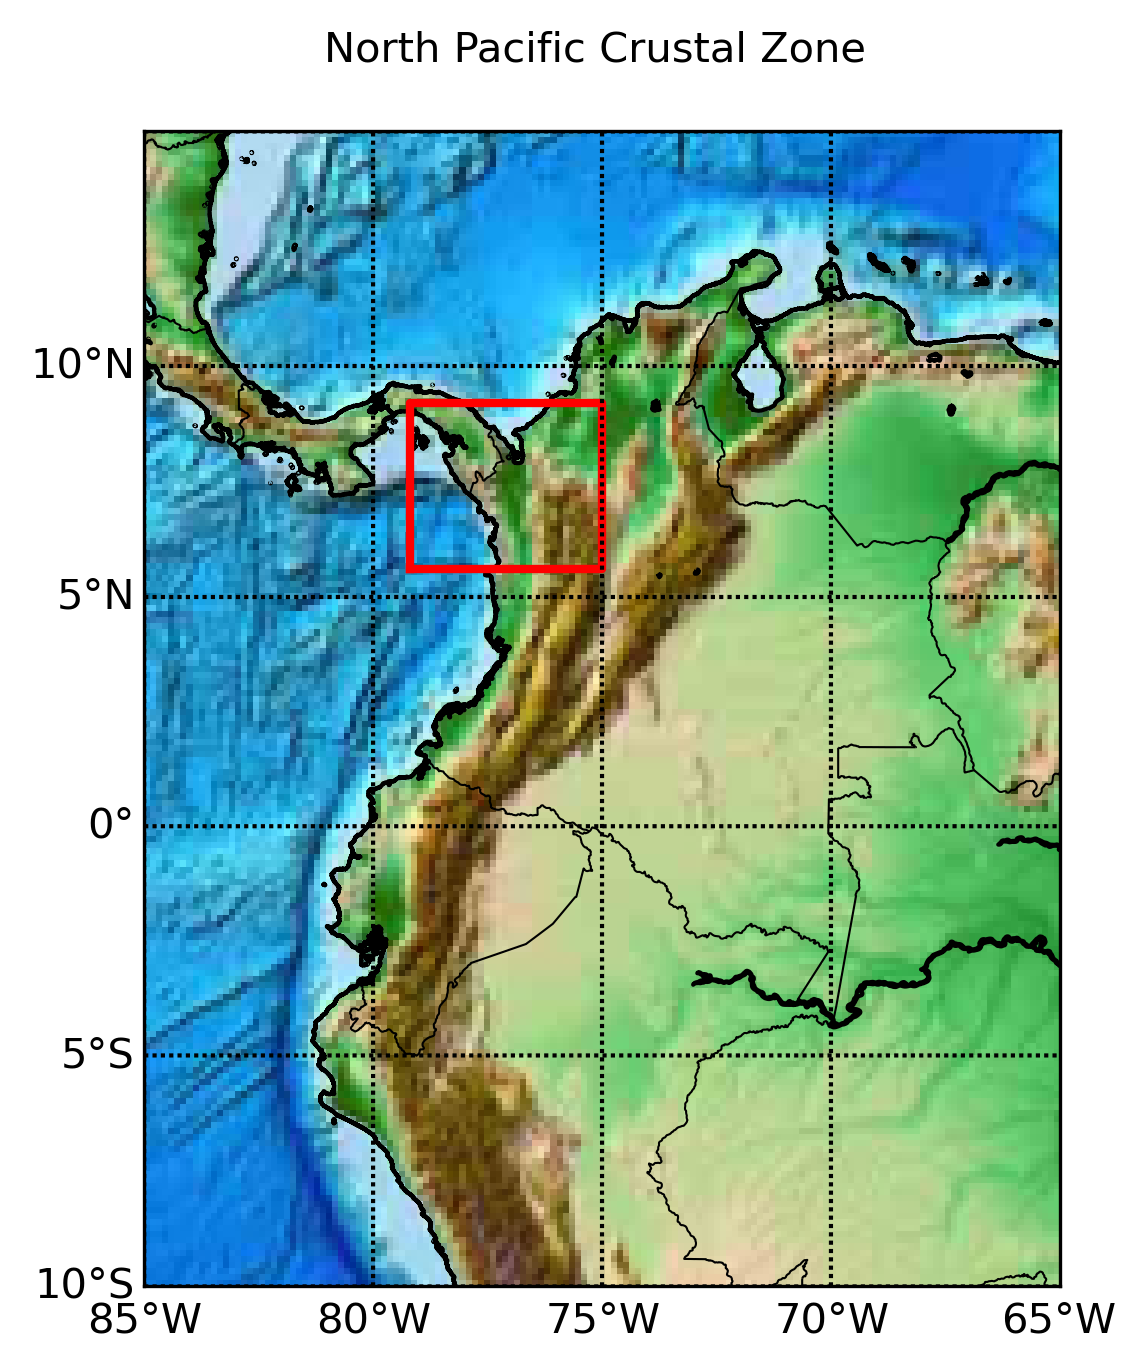

In [1]:
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(10, 5), dpi=300)

m = Basemap(projection='merc', 
            llcrnrlon=-85, llcrnrlat=-10,  
            urcrnrlon=-65, urcrnrlat=15,  
            resolution='f') 

m.etopo(scale=0.5)
m.drawcoastlines()
m.drawcountries()

# The North Pacific Crustal Zone is comprised by these coordinates:
lon_min, lon_max = -79.2, -75  
lat_min, lat_max = 5.6, 9.2    

x = [lon_min, lon_max, lon_max, lon_min, lon_min]
y = [lat_min, lat_min, lat_max, lat_max, lat_min]
m.plot(x, y, latlon=True, linewidth=2, color='r')

parallels = m.drawparallels(range(-10, 20, 5), labels=[1, 0, 0, 0], fontsize=10) 
meridians = m.drawmeridians(range(-85, -60, 5), labels=[0, 0, 0, 1], fontsize=10) 

plt.title("North Pacific Crustal Zone \n", fontsize=10)

plt.show()


### Import libraries

In [2]:
import os.path
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
import MTfit

This script for plotting LogN vs Magnitude is based on a text file that contains a column with the interval of magnitudes and 
another column with the number of earthquakes in that interval. It is necessary to load this file from the support files, and handle the interval calculation through this short code. The data was obtained frm the National Seismological Network of Colombia [RSNC, 2024](http://bdrsnc.sgc.gov.co/paginas1/catalogo/index.php).

In [3]:
data = pd.read_csv("Frequency_magnitude.txt", header = None)
#Delete the row of text (First row)
data = data.drop(labels=0, axis=0)

#Name the column with all the data initial
data.columns = ["Initial"]
#Replace [] with () 
data['Initial'] = data['Initial'].str.replace('[','(', regex = False)
data['Initial'] = data['Initial'].str.replace(']',')', regex = False)

#Separate the columns of intervals and number of earthquakes 
data[['Intervals', 'N']] = data["Initial"].str.split(')', expand=True)

#Delete the initial column 
data = data.drop('Initial', axis=1)

#Remove the initial parenthesis of the intervals
data['Intervals'] = data['Intervals'].str.replace('(','', regex = False)

#Split the lower and upper limits of the intervals 
data[['Lower', 'Upper']] = data["Intervals"].str.split(';', expand=True)

#Remove the column of intervals 
data = data.drop('Intervals', axis=1)

#Extract the numeric data from N 
data["N"] = data["N"].str.extract('(\d+)')

#Remove spaces from all the columns 
data.N = data.N.str.strip()
data.Upper = data.Upper.str.strip()
data.Lower = data.Lower.str.strip()

#Convert all the columns to float 
data = data.astype(float)
print(data.dtypes)

#Calculate the average of lower and upper 
data["MC"] = (data["Lower"]+data["Upper"])/2
#Calculate LogN
data["LogN"] = np.log10(data["N"])

#Create a new dataframe just with MC, N and LogN 
data_2plot = data[['MC', 'N', 'LogN']].copy()

N        float64
Lower    float64
Upper    float64
dtype: object


### Plot LogN vs Magnitude

Coefficients
-1.0521875560492593 6.7935229626367235


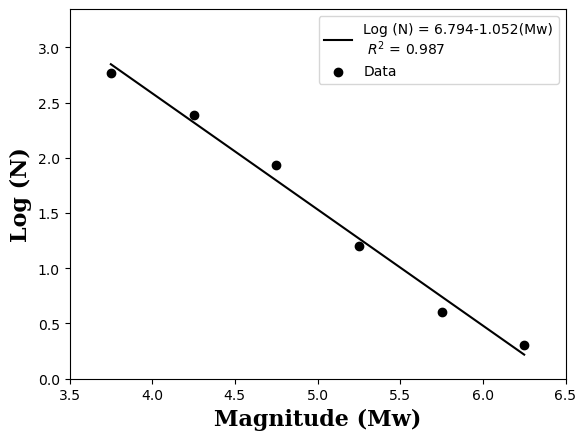

In [4]:
#Read and display data
#Computing X and Y
X = data_2plot['MC'].values
Y = data_2plot['LogN'].values

#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
n = len(X)

#Use the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

m = numer / denom
c = mean_y - (m * mean_x)
 
#Print coefficients
print("Coefficients")
print(m, c)
 
#Plot Values and Regression Line
 
max_x = np.max(X)
min_x = np.min(X)
 
#Calculate line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x


cstring = str(round(c,3))
mstring = str(round(m,3))

#Calculate R2
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = c + m * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)

#Plot line and scatter points 

font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x, y, color='#000000', label='Log (N) = '
          +cstring +mstring+'(Mw)' + "\n" ' $R^{{{2}}}$ = '+str(round(r2,3)))
plt.scatter(X, Y, c='#000000', label='Data')
ax.set_ylim(0, max(y) + 0.5)
ax.set_xlim(3.5, 6.5)
plt.xlabel('Magnitude (Mw)', fontdict=font)
plt.ylabel('Log (N)', fontdict=font)
plt.legend()
plt.show()


This graph gives us the Gutengberg-Richter relationship, with an a parameter of 6.794 and a b parameter of 1.052. The b parameter is the slope of the graph, while a is the independent term. Comparing this b value to other cortical sources of Colombia, this is one of the biggest (Arcila et al., 2020).

### Plot the events vs depth

Text(0, 0.5, 'Number of Earthquakes')

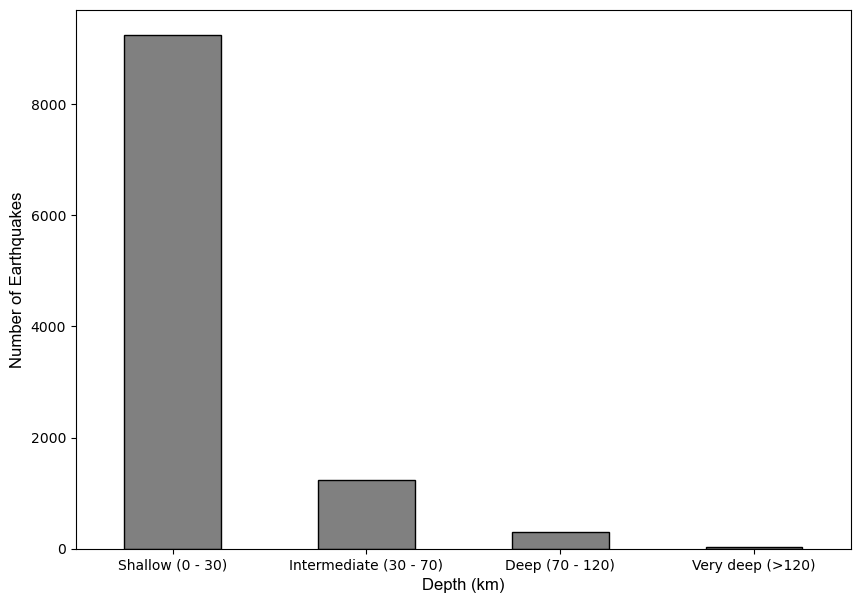

In [5]:
df = pd.read_csv('RSNC_1993_2022.csv', header = 0, sep=";")

out = pd.cut(df["depth"], bins=[-4,30,70,120,700])
fig, ax = plt.subplots(figsize=(10, 7))
(
    pd.cut(df['depth'], bins=[-4,30,70,120,700], labels=["Shallow (0 - 30)", "Intermediate (30 - 70)", "Deep (70 - 120)", "Very deep (>120)"])
        .value_counts()
        .sort_index()
        .plot.bar(ax=ax, color='gray', edgecolor='black')
        
)
plt.xticks(rotation=0)
plt.xlabel(xlabel = "Depth (km)", font = "Arial", fontsize = "12")
plt.ylabel(ylabel = "Number of Earthquakes", font = "Arial", fontsize = "12")

It is checked that most of the earthquakes are shallow (<30 km)

### Plot earthquakes vs years

Text(0, 0.5, 'Number of Earthquakes')

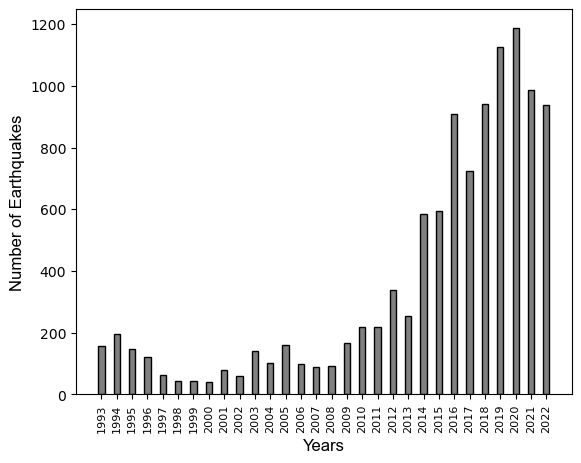

In [6]:
bins = np.arange(1993,2024,1) - 0.5
plt.figure().set_figheight(5)
plt.hist(df["year"], bins, rwidth=0.4, color='gray', edgecolor='black')
plt.xticks(ticks=np.arange(1993,2023,1), rotation='vertical', fontsize=8)
plt.xlabel(xlabel = "Years", font = "Arial", fontsize = "12")
plt.ylabel(ylabel = "Number of Earthquakes", font = "Arial", fontsize = "12")

This plot does not mean that there are more earthquakes with time, rather it shows the capacity to detect them by the National Seismological Network of Colombia

### Calculate the resultant seismic moment tensor and its parameters

In [7]:
df = pd.read_excel("Focal_mechanisms.xlsx", parse_dates=True)

#In this database, there has to be 17 columns: Strike, Dip, Slip, Mo, Día, Mes, Año,
#AzimuthP, PlungeP, AzimuthT, PlungeT, Rigidez (Din/cm^2), Diferencia Profundidad (Km), Área (Km^2),
#Rango Temporal (Años), Ángulo (FS) and Longitud (FS). These focal mechanisms were downloaded from the GCMT, ISC and RSNC catalogs

In [8]:
#Calculate the components of the resultant seismic moment tensor
df["Dip"] = df["Dip"].astype(float)
df["Slip"] = df["Slip"].astype(float)
df["Strike"] = df["Strike"].astype(float)
df["Mo"] = df["Mo"].astype(float)
df2 = df[['Día', 'Mes','Año','Strike','Slip','Dip','Mo']].copy()
df2['Mxx'] = -df['Mo']*((np.sin(df["Dip"]* np.pi / 180.)*np.cos(df["Slip"]* np.pi / 180.)*np.sin(2*df["Strike"]* np.pi / 180.))+(np.sin(2*df["Dip"]* np.pi / 180.)*np.sin(df["Slip"]* np.pi / 180.)*((np.sin(df["Strike"]* np.pi / 180.))**2)))
df2['Mxy = Myx'] = df['Mo']*((np.sin(df["Dip"]* np.pi / 180.)*np.cos(df["Slip"]* np.pi / 180.)*np.cos(2*df["Strike"]* np.pi / 180.))+((0.5*np.sin(2*df["Dip"]* np.pi / 180.)*np.sin(df["Slip"]* np.pi / 180.)*np.sin(2*df["Strike"]* np.pi / 180.))))
df2['Mxz = Mzx'] = -df['Mo']*((np.cos(df["Dip"]* np.pi / 180.)*np.cos(df["Slip"]* np.pi / 180.)*np.cos(df["Strike"]* np.pi / 180.))+(np.cos(2*df["Dip"]* np.pi / 180.)*np.sin(df["Slip"]* np.pi / 180.)*np.sin(df["Strike"]* np.pi / 180.)))
df2['Myy'] = df['Mo']*((np.sin(df["Dip"]* np.pi / 180.)*np.cos(df["Slip"]* np.pi / 180.)*np.sin(2*df["Strike"]* np.pi / 180.))-(np.sin(2*df["Dip"]* np.pi / 180.)*np.sin(df["Slip"]* np.pi / 180.)*((np.cos(df["Strike"]* np.pi / 180.))**2)))
df2['Myz = Mzy'] = -df['Mo']*((np.cos(df["Dip"]* np.pi / 180.)*np.cos(df["Slip"]* np.pi / 180.)*np.sin(df["Strike"]* np.pi / 180.))-(np.cos(2*df["Dip"]* np.pi / 180.)*np.sin(df["Slip"]* np.pi / 180.)*np.cos(df["Strike"]* np.pi / 180.)))
df2['Mzz'] = df['Mo']*(np.sin(2*df["Dip"]* np.pi / 180.)*np.sin(df["Slip"]* np.pi / 180.))
col_list= ['Mxx', 'Mo', 'Mxy = Myx', 'Mxz = Mzx', 'Myy', 'Myz = Mzy', 'Mzz']
#Sum the components
df2.loc["Total"] = df2[col_list].sum()



In [9]:
#Print the resultant seismic moment tensor as a matrix
moment = [[df2.iloc[-1]['Mxx'], df2.iloc[-1]['Mxy = Myx'], df2.iloc[-1]['Mxz = Mzx']], 
          [(df2.iloc[-1]['Mxy = Myx']), df2.iloc[-1]['Myy'], df2.iloc[-1]['Myz = Mzy']],
          [(df2.iloc[-1]['Mxz = Mzx']), (df2.iloc[-1]['Myz = Mzy']), (df2.iloc[-1]['Mzz'])]]
mat = np.matrix(moment)
print(mat)

[[-7.30117047e+26  7.61597037e+26 -8.63040636e+25]
 [ 7.61597037e+26  5.28508627e+26 -6.03381143e+25]
 [-8.63040636e+25 -6.03381143e+25  2.01608420e+26]]


In [10]:
#Obtain parameters for the summed seismic moment tensor by using MTfit
#First, strike, dip and slip
tup = MTfit.convert.moment_tensor_conversion.MT33_SDR(mat)
strike = tup[0][0]*180 / np.pi
dip = tup[1][0]*180 / np.pi
rake = tup[2][0]*180 / np.pi
print("Strike, Dip and Rake, respectively", strike, dip, rake)

Strike, Dip and Rake, respectively 19.96042277175442 83.06591592052392 3.6549871141444052


In [11]:
#Perform eigenvalue and eigenvector decomposition based on the resultant seismic moment tensor
eigenvalues, eigenvectors = np.linalg.eig(mat)

#Sort eigenvalues and corresponding eigenvectors
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [12]:
#Define the principal axes
def calculate_azimuth_plunge(vector):
    # Azimuth calculation
    azimuth = np.arctan2(vector[1], vector[0])
    azimuth = np.degrees(azimuth)
    if azimuth < 0:
        azimuth += 360  # Ensure azimuth is in the range [0, 360]

    # Plunge calculation
    plunge = np.arcsin(vector[2])
    plunge = np.degrees(plunge)

    return azimuth, plunge

#Calculate azimuth and plunge for each principal axis
azimuth_T, plunge_T = calculate_azimuth_plunge(eigenvectors[:, 0])
azimuth_N, plunge_N = calculate_azimuth_plunge(eigenvectors[:, 1])
azimuth_P, plunge_P = calculate_azimuth_plunge(eigenvectors[:, 2])

print("Azimuth_P, plunge_P, azimuth_N, plunge_N, azimuth_T, plunge_T, respectively:",azimuth_P, plunge_P, azimuth_N, plunge_N, azimuth_T, plunge_T ) 

Azimuth_P, plunge_P, azimuth_N, plunge_N, azimuth_T, plunge_T, respectively: [[154.89115638]] [[-2.32799525]] [[82.07659806]] [[82.16577055]] [[64.58548414]] [[-7.47619771]]


### Deformation velocity tensor based on Kostrov (1974)

To calculate this deformation velocity tensor, we are based on the formulations of Kostrov (1974), that stated that it is given by: 

$$
\frac{1}{2\mu \Delta V \Delta T} \sum_{K=1}^{N} M_{ij}^{K} \quad (K=1, 2, \dots, N)
$$

Where $M_{ij}^{K}$ is the seismic moment resulting in a volume $\Delta V$ and a time span $\Delta T$, and $\mu$ is the rigidity modulus, which has a value of $3.3 \times 10^{10} \, \text{N/m}^2$ (Stacey, 1992).

In [13]:
#Average deformation velocity
#This part of the script uses the same excel file of input for the seismic 
#moment tensor, specifically the columns of AzimuthP, PlungeP, AzimuthT, PlungeT, 
#Rigidez (Din/cm^2), Diferencia Profundidad (Km), Área (Km^2) and 
#Rango Temporal (Años)
#The columns of Rigidez (Din/cm^2), Diferencia Profundidad (Km), Área (Km^2), 
#Rango Temporal (Años), Ángulo (FS) and Longitud (FS) consist of only one value

#Take the values from the provided file
rigid = df.iloc[0]["Rigidez (Din/cm^2)"] 
thickness = df.iloc[0]["Diferencia Profundidad (Km)"]
area = df.iloc[0]["Área (Km^2)"] 
volume = area*thickness*10**15
time = df.iloc[0]["Rango Temporal (Años)"] 
e1 = 1/(2*rigid*volume*time)

In [14]:
e = np.multiply(moment, e1)
print("The tensor of deformation velocities is: ", e)
values_def = np.linalg.eigvalsh(e)
print("The eigenvalues for this tensor are: ", values_def)

The tensor of deformation velocities is:  [[-2.06314995e-08  2.15210547e-08 -2.43876274e-09]
 [ 2.15210547e-08  1.49344897e-08 -1.70502221e-09]
 [-2.43876274e-09 -1.70502221e-09  5.69700986e-09]]
The eigenvalues for this tensor are:  [-3.08262401e-08  5.41839698e-09  2.54078431e-08]


According to Corredor (2003), the maximum eigenvalue multiplied by the length of the seismogenic zone in the direction of the maximum compressional axis provides a measure of crustal shortening. In this case, the length is around 280.5 km:

In [15]:
l = df.iloc[0]["Longitud (FS)"] 
shortening = l*1000*values_def
print("The shortening in m/year is: ", shortening)

The shortening in m/year is:  [-0.0086422   0.00151906  0.00712314]


We have to look at the greatest value, which is 0.0086422 m/year, or 8.64 mm/year. This value can be compared with the data obtained from GNSS stations for this region, but their density is not enough. That comparison could give us insights about whether the strain release is seismic or not. 

### Conclusion
<p style='text-align: justify;'> Throughout this Notebook, the seismotectonics of the North Pacific Crustal Zone was analyzed. The b parameter was obtained, and the earthquakes in this region where plotted against time and depth. It was proved that the majority of earthquakes in this region are shallow. Additionally, the focal mechanisms of different sources were obtained and used to calculate the deformation velocity of this zone, giving a shortening of 8.64 mm/year. This should be compared to GNSS stations in order to compare the magnitudes and state whether the strain is released seismically or aseismically. The P axis of the resultant focal mechanism is oriented NW-SE, revealing some insights from the regional tectonics in the area.<p/> 

If you have any questions or suggestions, contact me ;).

drestrepoj06@gmail.com, 
jdrestrepo@sgc.gov.co


### Sources
- **Aki, K. & Richards, P. (1980)**. Quantitative seismology: theory and methods (Vol. 859). Freeman San Francisco, CA.

- **Arcila, M., Espitia, J., Eraso, J., Torres, J., Cuevas, M., Viganò, D., Pagani, M., & Parra, F. (2020)**. Modelo nacional de amenaza sísmica para Colombia.

- **Cardona, C., Salcedo, E., & Mora, H. (2005)**. Caracterización sismotectónica y geodinámica de la fuente sismogénica de Murindó-Colombia. *Boletín de Geología, 27(1), 115–132*.

- **Corredor, F. (2003)**. Seismic strain rates and distributed continental deformation in the northern Andes and three-dimensional seismotectonics of northwestern South America. *Tectonophysics, 372(3–4), 147–166*.

- **Kellogg, J., Camelio, G., & Mora-Páez, H. (2019)**. Cenozoic tectonic evolution of the North Andes with constraints from volcanic ages, seismic reflection, and satellite geodesy. In *Andean Tectonics (Issue January)*. https://doi.org/10.1016/b978-0-12-816009-1.00006-x

- **Kobayashi, D., LaFemina, P., Geirsson, H., Chichaco, E., Abrego, A., Mora, H., & Camacho, E. (2014)**. Kinematics of the western Caribbean: Collision of the Cocos Ridge and upper plate deformation. *Geochemistry, Geophysics, Geosystems, 15(5), 1671–1683*.

- **Kostrov, V. (1974)**. Seismic moment and energy of earthquakes, and the seismic flow of rock. *Izv. Acad. Sci. USSR. Phys. Solid Earth, 1, 23-44*.

- **Mora-Páez, H., Kellogg, J., Freymueller, J., Mencin, D., Fernandes, R., Diederix, H., LaFemina, P., Cardona-Piedrahita, L., Lizarazo, S., Peláez-Gaviria, J., Díaz-Mila, F., Bohórquez-Orozco, O., Giraldo-Londoño, L., & Corchuelo-Cuervo, Y. (2019)**. Crustal deformation in the northern Andes – A new GPS velocity field. *Journal of South American Earth Sciences, 89 (November 2018), 76–91*. https://doi.org/10.1016/j.jsames.2018.11.002

- **Poveda, E., Monsalve, G., & Vargas, C. (2015)**. Receiver functions and crustal structure of the northwestern Andean region, Colombia. *Journal of Geophysical Research: Solid Earth, 120(4), 2408–2425*.

- **Tary, J., Boada, M., Vargas, C., Monoga, A., Naranjo-Hernandez, D., & Quiroga, D. (2022)**. Source characteristics of the Mw 6 Mutatá earthquake, Murindo seismic cluster, northwestern Colombia. *Journal of South American Earth Sciences, 115(103728)*.

- **Stacey, F. D. (1992)**. Physics of the Earth. Brookfield Press. http://www.worldcat.org/isbn/9780646090917
